# **Skin Cancer** Prediction & Classification

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


### Import all the Dependencies

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ split_folders --output new_data --ratio .7 .1 .2 -- old_data


In [ ]:
IMAGE_SIZE = 256
CHANNELS = 3

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/newdata/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
   #   save_to_dir='/content/drive/MyDrive/skin/AugmentedImages'
)

Found 3058 images belonging to 5 classes.


In [ ]:
train_generator.class_indices

{'sc_akiec': 0, 'sc_bcc': 1, 'sc_df': 2, 'sc_mel': 3, 'sc_nv': 4}

In [ ]:
class_names = list(train_generator.class_indices.keys())
class_names

['sc_akiec', 'sc_bcc', 'sc_df', 'sc_mel', 'sc_nv']

In [ ]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

In [ ]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/newdata/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 435 images belonging to 5 classes.


In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/newdata/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 878 images belonging to 5 classes.


In [ ]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.89019614 0.6083141  0.68580365]
  [0.8901413  0.6073498  0.68605524]
  [0.88961554 0.6026179  0.6839522 ]
  ...
  [0.909804   0.6074097  0.72156864]
  [0.9122384  0.6117647  0.7313067 ]
  [0.9065283  0.5997693  0.7180623 ]]

 [[0.89150274 0.6130714  0.6836596 ]
  [0.89019614 0.6116745  0.6824432 ]
  [0.89019614 0.6111488  0.682969  ]
  ...
  [0.909804   0.60898703 0.72156864]
  [0.91276425 0.6117647  0.7334097 ]
  [0.904951   0.5971405  0.7138561 ]]

 [[0.9015607  0.6231293  0.6929173 ]
  [0.90158397 0.6231526  0.69374084]
  [0.90000665 0.62157524 0.69216347]
  ...
  [0.909804   0.61056435 0.72156864]
  [0.91328996 0.6117647  0.73551273]
  [0.90337366 0.5945117  0.70965   ]]

 ...

 [[0.8451047  0.59542704 0.656218  ]
  [0.84382415 0.602548   0.6620583 ]
  [0.8399379  0.60072225 0.6371502 ]
  ...
  [0.8431373  0.5836551  0.62451744]
  [0.8431373  0.5826036  0.6260947 ]
  [0.8431373  0.581552   0.6276721 ]]

 [[0.846682   0.59595287 0.658321  ]
  [0.8432983  0.60359955 0.6625841 ]


## Building the Model

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//validation_generator.batch_size,
    verbose=1,
    epochs=30,
)

Epoch 1/30
95/95 [==============================] - 926s 10s/step - loss: 0.8174 - accuracy: 0.7779 - val_loss: 0.7085 - val_accuracy: 0.7837
Epoch 2/30
95/95 [==============================] - 380s 4s/step - loss: 0.6600 - accuracy: 0.7849 - val_loss: 0.6275 - val_accuracy: 0.7909
Epoch 3/30
95/95 [==============================] - 379s 4s/step - loss: 0.6430 - accuracy: 0.7862 - val_loss: 0.6514 - val_accuracy: 0.7812
Epoch 4/30
95/95 [==============================] - 377s 4s/step - loss: 0.6194 - accuracy: 0.7859 - val_loss: 0.6166 - val_accuracy: 0.8029
Epoch 5/30
95/95 [==============================] - 382s 4s/step - loss: 0.5846 - accuracy: 0.7872 - val_loss: 0.5797 - val_accuracy: 0.7933
Epoch 6/30
95/95 [==============================] - 376s 4s/step - loss: 0.5626 - accuracy: 0.7878 - val_loss: 0.5669 - val_accuracy: 0.7933
Epoch 7/30
95/95 [==============================] - 382s 4s/step - loss: 0.5360 - accuracy: 0.7921 - val_loss: 0.5281 - val_accuracy: 0.8221
Epoch 8/30
9

In [ ]:
scores = model.evaluate(test_generator)

28/28 [==============================] - 70s 3s/step - loss: 0.7405 - accuracy: 0.8132


In [ ]:
scores

[0.7404788136482239, 0.8132118582725525]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [ ]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [ ]:
history.params

{'epochs': 30, 'steps': 95, 'verbose': 1}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [ ]:
type(history.history['loss'])

list

In [ ]:
len(history.history['loss'])

30

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8174228072166443,
 0.6600162386894226,
 0.6430181264877319,
 0.6193738579750061,
 0.5846067667007446]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
val_acc

[0.7836538553237915,
 0.7908653616905212,
 0.78125,
 0.8028846383094788,
 0.7932692170143127,
 0.7932692170143127,
 0.8221153616905212,
 0.7980769276618958,
 0.78125,
 0.8269230723381042,
 0.7956730723381042,
 0.8149038553237915,
 0.817307710647583,
 0.838942289352417,
 0.817307710647583,
 0.8293269276618958,
 0.8100961446762085,
 0.8197115659713745,
 0.8413461446762085,
 0.8293269276618958,
 0.8341346383094788,
 0.8269230723381042,
 0.8100961446762085,
 0.8365384340286255,
 0.8269230723381042,
 0.8461538553237915,
 0.848557710647583,
 0.8341346383094788,
 0.8197115659713745,
 0.8293269276618958]

In [ ]:
acc

[0.777924656867981,
 0.7848644852638245,
 0.7861863970756531,
 0.7858558893203735,
 0.7871778011322021,
 0.7878387570381165,
 0.7921348214149475,
 0.7961004376411438,
 0.8000661134719849,
 0.8089887499809265,
 0.8162590861320496,
 0.8228684663772583,
 0.8231989145278931,
 0.8215466141700745,
 0.8195638060569763,
 0.8291473984718323,
 0.8377395868301392,
 0.8374091386795044,
 0.8393919467926025,
 0.8374091386795044,
 0.8456708788871765,
 0.8466622829437256,
 0.8519497513771057,
 0.8489755392074585,
 0.8638466596603394,
 0.8651685118675232,
 0.858889639377594,
 0.879048228263855,
 0.8724388480186462,
 0.8734302520751953]

In [ ]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

image to predict
actual label: sc_nv
predicted label: sc_nv


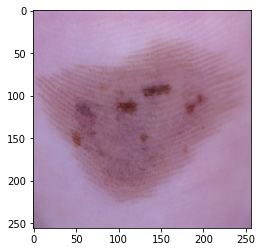

In [ ]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

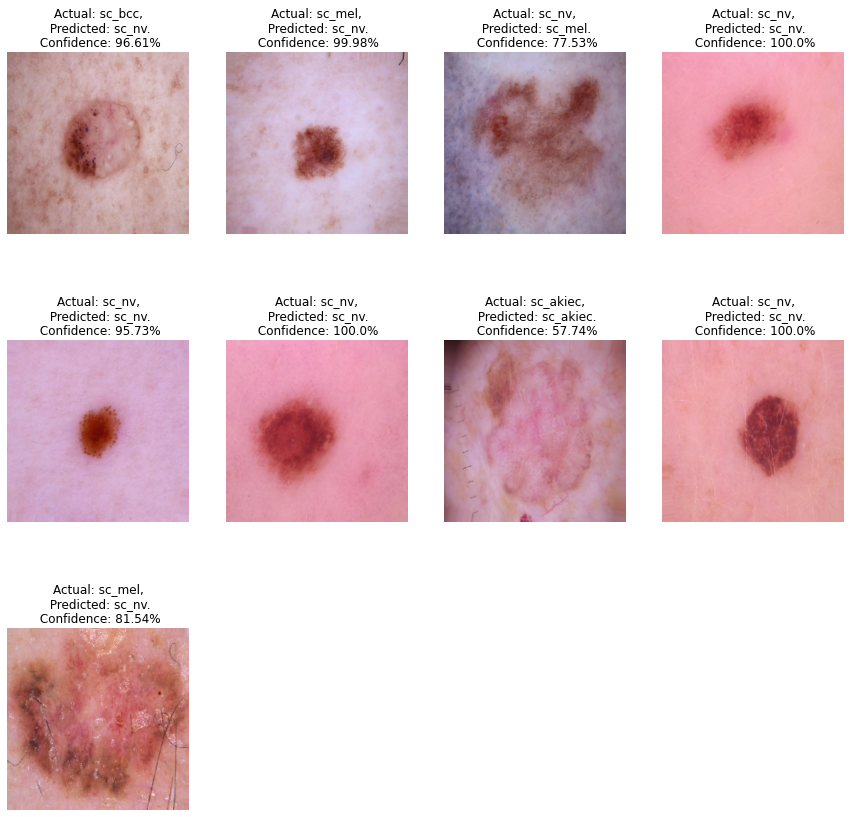

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [ ]:
model.save("/content/drive/MyDrive/skin/models/skin3.h5")
model.save("/content/drive/MyDrive/newdata/models/skin3.h5")